## Feature Selection and Feature Engineering

In [22]:
from sklearn.datasets import load_boston 

boston = load_boston()
x = boston.data
y = boston.target

In [4]:
x.shape

(506, 13)

In [5]:
y.shape

(506,)

In [6]:
from sklearn.model_selection import train_test_split

Xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

### Categorical data transformation

In [7]:
import numpy as np

x = np.random.uniform(0.0, 1.0, size=(10,2))
y = np.random.choice(('Male','Female'), size=(10))

In [8]:
x[0]

array([0.79897971, 0.71249215])

In [9]:
y[0]

'Female'

In [10]:
print(y)

['Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male']


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yt = le.fit_transform(y)

In [12]:
print(yt)

[0 1 1 1 1 0 1 1 0 1]


In [16]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
yb = lb.fit_transform(y)

In [17]:
print(yb)

[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [18]:
lb.inverse_transform(yb)

array(['Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male'], dtype='<U6')

In [19]:
Y = lb.fit_transform(y)

In [20]:
print(Y)

[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [26]:
data = [
    {'feature_1': 10.0, 'feature_2': 15.0 }, 
    {'feature_1': -5.0, 'feature_3': 22.0 },
    {'feature_3': -2.0, 'feature_4': 10.0 }
]

In [27]:
from sklearn.feature_extraction import DictVectorizer, FeatureHasher

dv = DictVectorizer()
y_dict = dv.fit_transform(data)

In [28]:
y_dict.toarray()

array([[10., 15.,  0.,  0.],
       [-5.,  0., 22.,  0.],
       [ 0.,  0., -2., 10.]])

In [29]:
dv.vocabulary_

{'feature_1': 0, 'feature_2': 1, 'feature_3': 2, 'feature_4': 3}

In [30]:
fh = FeatureHasher()
y_hashed = fh.fit_transform(data)

In [31]:
y_hashed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1]:
data = [
      [0, 10],
      [1, 11],
      [1, 8],
      [0, 12],
      [0, 15]
]

In [2]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
y_oh = one_hot.fit_transform(data)

/Users/ujjawalpathak/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
y_oh.todense()

matrix([[1., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1.]])

### Managing Missing Values

In [12]:
from sklearn.preprocessing import Imputer
import numpy as np
data = np.array([[1,2,np.nan],
                 [np.nan,3,4],
                 [5,np.nan,6]])

In [7]:
data

array([[ 1.,  2., nan],
       [nan,  3.,  4.],
       [ 5., nan,  6.]])

In [8]:
imp = Imputer(strategy='mean')
imp.fit_transform(data)

array([[1. , 2. , 5. ],
       [3. , 3. , 4. ],
       [5. , 2.5, 6. ]])

In [10]:
data = np.array([[1,2,np.nan],
                 [np.nan,4,8],
                 [5,np.nan,9]])

In [11]:
imp = Imputer(strategy='median')
imp.fit_transform(data)

array([[1. , 2. , 8.5],
       [3. , 4. , 8. ],
       [5. , 3. , 9. ]])

In [13]:
imp = Imputer(strategy='most_frequent')
imp.fit_transform(data)

array([[1., 2., 4.],
       [1., 3., 4.],
       [5., 2., 6.]])

### Data Scaling and Normalization

In [5]:
import numpy as np

x,y = np.random.rand(2,10,10)

In [6]:
x

array([[0.09717419, 0.33449206, 0.79060285, 0.45531899, 0.29869937,
        0.810256  , 0.65923775, 0.05034936, 0.03951467, 0.19781646],
       [0.52684649, 0.94412906, 0.45910059, 0.63060596, 0.2316897 ,
        0.864724  , 0.50740592, 0.36917607, 0.71760323, 0.16232522],
       [0.9442713 , 0.41181712, 0.88315063, 0.15931882, 0.69836729,
        0.09933331, 0.04937721, 0.08720115, 0.55747422, 0.44456683],
       [0.50046164, 0.44343208, 0.92597715, 0.67863732, 0.56295596,
        0.77756877, 0.46532502, 0.77037918, 0.63388976, 0.73992248],
       [0.93070532, 0.82480753, 0.53745199, 0.92956539, 0.26155628,
        0.6406027 , 0.16245726, 0.52120258, 0.93210282, 0.58186225],
       [0.96380911, 0.18209755, 0.89154086, 0.89225865, 0.10394772,
        0.03270641, 0.97404299, 0.82692824, 0.31878108, 0.68008328],
       [0.58643174, 0.13634505, 0.54595069, 0.52238794, 0.4264213 ,
        0.09992791, 0.86345271, 0.06002804, 0.48753469, 0.33483286],
       [0.22020323, 0.95253097, 0.0113037

In [7]:
y

array([[0.30370211, 0.01872081, 0.42141759, 0.70480253, 0.51620985,
        0.38682037, 0.8223483 , 0.31465512, 0.81800135, 0.36076807],
       [0.28669375, 0.16048436, 0.10043756, 0.38501767, 0.07757184,
        0.81533443, 0.22411208, 0.78074335, 0.02006811, 0.84453114],
       [0.73828542, 0.22207053, 0.34374978, 0.03015802, 0.51440183,
        0.17475687, 0.13242795, 0.7932041 , 0.37786926, 0.95963362],
       [0.84817116, 0.65170011, 0.64515102, 0.11483797, 0.06393647,
        0.5081678 , 0.94258547, 0.25242114, 0.78927161, 0.84426289],
       [0.54724579, 0.77210254, 0.21271179, 0.92794256, 0.80800391,
        0.48143285, 0.03946988, 0.0287722 , 0.43269532, 0.64647974],
       [0.08508324, 0.07082801, 0.50031283, 0.3923345 , 0.61577686,
        0.25952933, 0.81374486, 0.12678369, 0.19995929, 0.9025057 ],
       [0.84378258, 0.73860408, 0.70787658, 0.05022893, 0.25553393,
        0.54425407, 0.92076206, 0.11995088, 0.09008138, 0.00655638],
       [0.99186968, 0.0851277 , 0.6992927

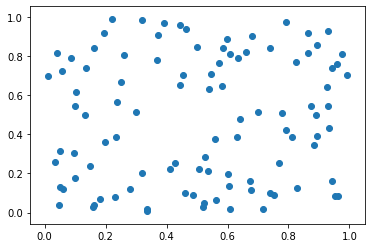

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x,y);

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_data = ss.fit_transform(x)

### Normalization

In [17]:
from sklearn.preprocessing import Normalizer

data = np.array([1.0,2.0])

n_max = Normalizer(norm='max')
n_max.fit_transform(data.reshape(1,-1))

array([[0.5, 1. ]])